In [1]:
import numpy as np
import torch
import json 
import re
import pickle 
import os
import matplotlib.pyplot as plt

#### Create a new_model.pt which includes the hyperparameters

In [2]:
def custom_sort(item):
    # Extract numbers after 'k' and 'd'
    k_number = int(re.search(r'k(\d+)', item).group(1))
    d_number = int(re.search(r'd(\d+)', item).group(1))
    return k_number, d_number

# Sort the list using the custom sorting function
sorted_data = sorted(os.listdir("all_results"), key=custom_sort)

path = [os.path.join("all_results", i) for i in sorted_data]

for i in range(len(path)):
    config = torch.load(path[i] + "/ckpt/best_model.pt")
    
    open_config = open(path[i] + '/logs/config.json')
    config_file = json.load(open_config)
    open_config.close()
    
    config["hyperparameters"] = config_file["config_model"]

    new_path = open(path[i] + '/ckpt/new_model.pt', mode="wb")
    torch.save(config, new_path)

#### F1 TEST

In [2]:
with open(os.path.join("results/test_f1/", 'partition.pkl'), "rb") as file:
    partition = pickle.load(file)

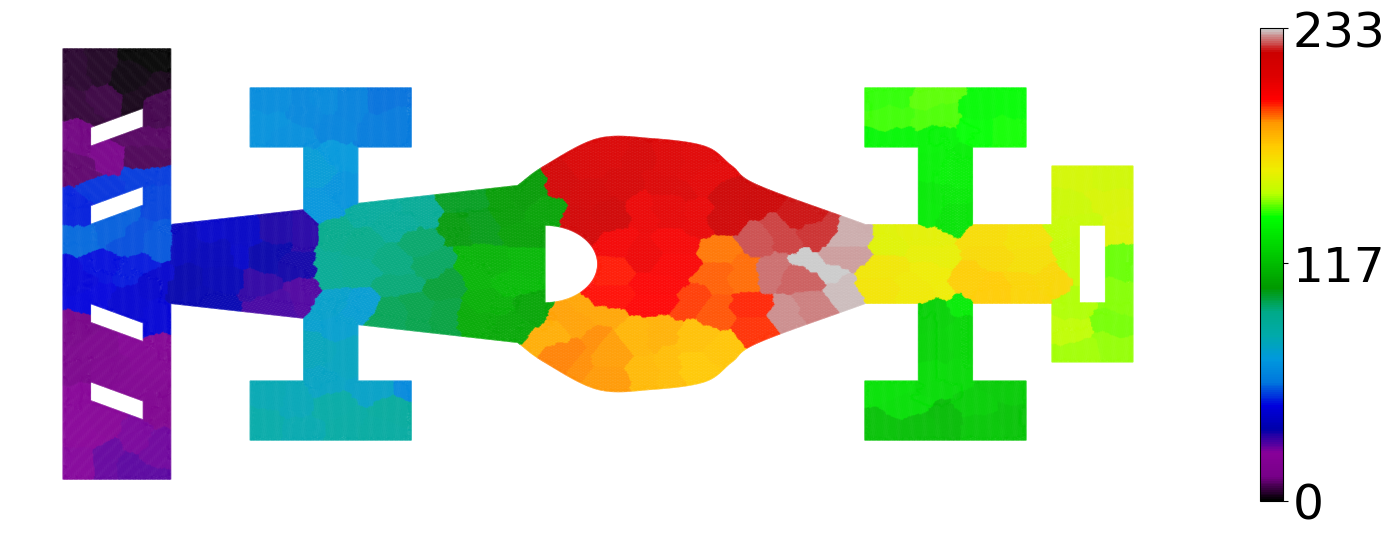

In [13]:
f1 = partition.full_graph
cx = f1.points[:, 0]
cy = f1.points[:, 1]
part = partition.original_membership
nparts = partition.original_membership.max() + 1

plt.figure(figsize=(15,5.5))
colormap = "nipy_spectral"
plt.scatter(partition.points[:,0],
            partition.points[:,1],
            c = partition.full_graph.membership,
            cmap = colormap,
            s = 0.1)
plt.axis('off')
cbar = plt.colorbar(ticks=[0, int(nparts/2), nparts-1])
cbar.ax.tick_params(labelsize=35)
cbar.ax.yaxis.offsetText.set(size=20)
plt.tight_layout()
plt.savefig("results/test_f1/partition.png", dpi = 300, transparent = True)

In [27]:
len(partition.points)

233246

In [4]:
open_config = open('results/test_f1/results.json')
results = json.load(open_config)
open_config.close()

In [5]:
res_ddml = results["k30_d10"]["residual"]
list_ddml = [v for k, v in res_ddml.items()]
res_asm = results["ASM-LU"]["residual"]
list_asm = [v for k, v in res_asm.items()]
res_cg = results["CG"]["residual"]
list_cg = [v for k, v in res_cg.items()]

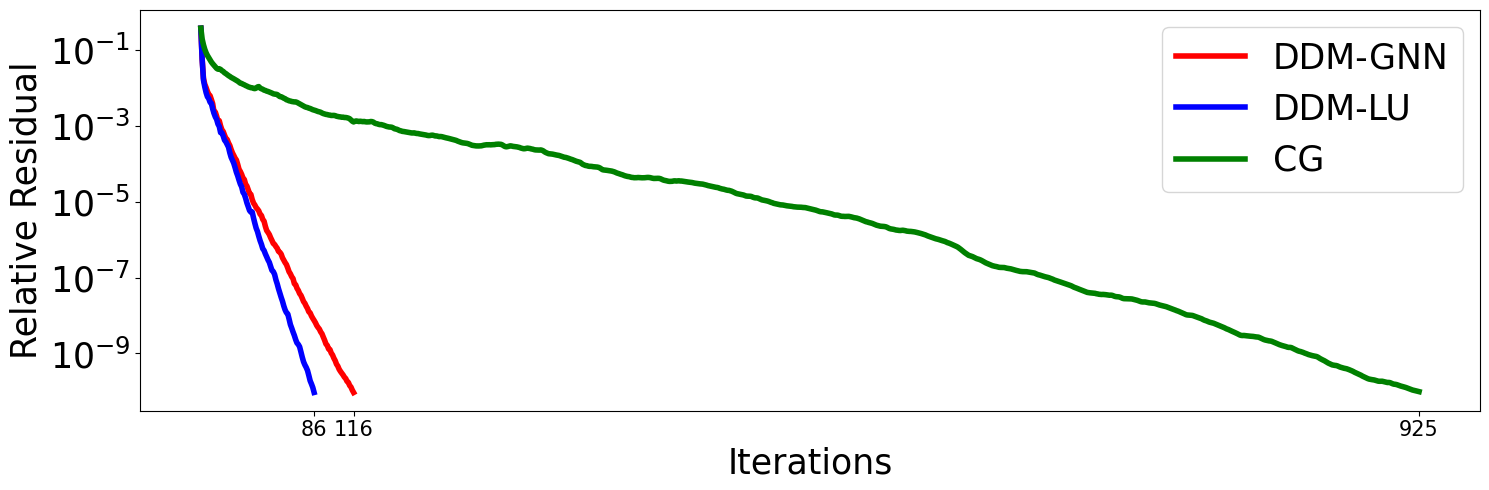

In [7]:
plt.figure(figsize = (15,5))
plt.plot(list_ddml, lw = 4, c = "r", label="DDM-GNN")
plt.plot(list_asm,  lw = 4, c = "b", label="DDM-LU")
plt.plot(list_cg,   lw = 4, c = 'g' , label="CG")
plt.xlabel("Iterations", fontsize = 25)
plt.xticks(fontsize = 15, ticks=[len(list_ddml)-1, len(list_asm)-1, len(list_cg)-1])
plt.yticks(fontsize = 25)
plt.ylabel("Relative Residual", fontsize = 25)
plt.yscale("log")
plt.legend(fontsize = 25)
plt.tight_layout()
plt.savefig("results/test_f1/residual.png", dpi = 300, transparent = True)

### Test multiple problems of 10k with multiple models

In [2]:
open_config = open('results/test_saved_10k_multiple/results.json')
results = json.load(open_config)
open_config.close()

In [3]:
k5d5time, k5d10time, k5d20time, k10d5time, k10d10time, k10d20time, k20d5time, k20d10time, k20d20time, k30d10time, asm_lu_time = [], [], [], [], [], [], [], [], [], [], []
k5d5infer, k5d10infer, k5d20infer, k10d5infer, k10d10infer, k10d20infer, k20d5infer, k20d10infer, k20d20infer, k30d10infer, asm_lu_infer = [], [], [], [], [], [], [], [], [], [], []
k5d5step, k5d10step, k5d20step, k10d5step, k10d10step, k10d20step, k20d5step, k20d10step, k20d20step, k30d10step, asm_lu_step = [], [], [], [], [], [], [], [], [], [], []

for k in results.keys():
    prb = results[k]
    for i in prb.keys():
        if i == "k5_d5" :
            k5d5infer.append(prb[i]["mean_infer_time"])
            k5d5time.append(prb[i]["global_time"])
            k5d5step.append(prb[i]["nb_steps"])
        elif i == "k5_d10":
            k5d10infer.append(prb[i]["mean_infer_time"])
            k5d10time.append(prb[i]["global_time"])
            k5d10step.append(prb[i]["nb_steps"])
        elif i == "k5_d20":
            k5d20infer.append(prb[i]["mean_infer_time"])
            k5d20time.append(prb[i]["global_time"])
            k5d20step.append(prb[i]["nb_steps"])
        elif i == "k10_d5":
            k10d5infer.append(prb[i]["mean_infer_time"])
            k10d5time.append(prb[i]["global_time"])
            k10d5step.append(prb[i]["nb_steps"])
        elif i == "k10_d10":
            k10d10infer.append(prb[i]["mean_infer_time"])
            k10d10time.append(prb[i]["global_time"])
            k10d10step.append(prb[i]["nb_steps"])
        elif i == "k10_d20":
            k10d20infer.append(prb[i]["mean_infer_time"])
            k10d20time.append(prb[i]["global_time"])
            k10d20step.append(prb[i]["nb_steps"])
        elif i == "k20_d5":
            k20d5infer.append(prb[i]["mean_infer_time"])
            k20d5time.append(prb[i]["global_time"])
            k20d5step.append(prb[i]["nb_steps"])
        elif i == "k20_d10":
            k20d10infer.append(prb[i]["mean_infer_time"])
            k20d10time.append(prb[i]["global_time"])
            k20d10step.append(prb[i]["nb_steps"])
        elif i == "k20_d20":
            k20d20infer.append(prb[i]["mean_infer_time"])
            k20d20time.append(prb[i]["global_time"])
            k20d20step.append(prb[i]["nb_steps"])
        elif i == "k30_d10":
            k30d10infer.append(prb[i]["mean_infer_time"])
            k30d10time.append(prb[i]["global_time"])
            k30d10step.append(prb[i]["nb_steps"])
        elif i == "ASM-LU":
            asm_lu_infer.append(prb[i]["mean_infer_time"])
            asm_lu_time.append(prb[i]["global_time"])
            asm_lu_step.append(prb[i]["nb_steps"])


In [4]:
mean_k5d5time, mean_k5d10time, mean_k5d20time, mean_k10d5time, mean_k10d10time, mean_k10d20time, mean_k20d5time, mean_k20d10time, mean_k20d20time, mean_k30d10time, mean_asm_lu_time = np.mean(k5d5time), np.mean(k5d10time), np.mean(k5d20time), np.mean(k10d5time), np.mean(k10d10time), np.mean(k10d20time), np.mean(k20d5time), np.mean(k20d10time), np.mean(k20d20time), np.mean(k30d10time), np.mean(asm_lu_time)
std_k5d5time, std_k5d10time, std_k5d20time, std_k10d5time, std_k10d10time, std_k10d20time, std_k20d5time, std_k20d10time, std_k20d20time, std_k30d10time, std_asm_lu_time = np.std(k5d5time), np.std(k5d10time), np.std(k5d20time), np.std(k10d5time), np.std(k10d10time), np.std(k10d20time), np.std(k20d5time), np.std(k20d10time), np.std(k20d20time), np.std(k30d10time), np.std(asm_lu_time)

mean_k5d5infer, mean_k5d10infer, mean_k5d20infer, mean_k10d5infer, mean_k10d10infer, mean_k10d20infer, mean_k20d5infer, mean_k20d10infer, mean_k20d20infer, mean_k30d10infer, mean_asm_lu_infer = np.mean(k5d5infer), np.mean(k5d10infer), np.mean(k5d20infer), np.mean(k10d5infer), np.mean(k10d10infer), np.mean(k10d20infer), np.mean(k20d5infer), np.mean(k20d10infer), np.mean(k20d20infer), np.mean(k30d10infer), np.mean(asm_lu_infer)
std_k5d5infer, std_k5d10infer, std_k5d20infer, std_k10d5infer, std_k10d10infer, std_k10d20infer, std_k20d5infer, std_k20d10infer, std_k20d20infer, std_k30d10infer, std_asm_lu_infer = np.std(k5d5infer), np.std(k5d10infer), np.std(k5d20infer), np.std(k10d5infer), np.std(k10d10infer), np.std(k10d20infer), np.std(k20d5infer), np.std(k20d10infer), np.std(k20d20infer), np.std(k30d10infer), np.std(asm_lu_infer)

mean_k5d5step, mean_k5d10step, mean_k5d20step, mean_k10d5step, mean_k10d10step, mean_k10d20step, mean_k20d5step, mean_k20d10step, mean_k20d20step, mean_k30d10step, mean_asm_lu_step = np.mean(k5d5step), np.mean(k5d10step), np.mean(k5d20step), np.mean(k10d5step), np.mean(k10d10step), np.mean(k10d20step), np.mean(k20d5step), np.mean(k20d10step), np.mean(k20d20step), np.mean(k30d10step), np.mean(asm_lu_step)
std_k5d5step, std_k5d10step, std_k5d20step, std_k10d5step, std_k10d10step, std_k10d20step, std_k20d5step, std_k20d10step, std_k20d20step, std_k30d10step, std_asm_lu_step = np.std(k5d5step), np.std(k5d10step), np.std(k5d20step), np.std(k10d5step), np.std(k10d10step), np.std(k10d20step), np.std(k20d5step), np.std(k20d10step), np.std(k20d20step), np.std(k30d10step), np.std(asm_lu_step)

In [5]:
mean_time = [mean_k5d5time, mean_k5d10time, mean_k5d20time, mean_k10d5time, mean_k10d10time, mean_k10d20time, mean_k20d5time, mean_k20d10time, mean_k20d20time, mean_k30d10time, mean_asm_lu_time]
mean_step = [mean_k5d5step, mean_k5d10step, mean_k5d20step, mean_k10d5step, mean_k10d10step, mean_k10d20step, mean_k20d5step, mean_k20d10step, mean_k20d20step, mean_k30d10step, mean_asm_lu_step]

mean_infer = [mean_k5d5infer, mean_k5d10infer, mean_k5d20infer, mean_k10d5infer, mean_k10d10infer, mean_k10d20infer, mean_k20d5infer, mean_k20d10infer, mean_k20d20infer, mean_k30d10infer, mean_asm_lu_infer]
std_infer = [std_k5d5infer, std_k5d10infer, std_k5d20infer, std_k10d5infer, std_k10d10infer, std_k10d20infer, std_k20d5infer, std_k20d10infer, std_k20d20infer, std_k30d10infer, std_asm_lu_infer]

std_time = [std_k5d5time, std_k5d10time, std_k5d20time, std_k10d5time, std_k10d10time, std_k10d20time, std_k20d5time, std_k20d10time, std_k20d20time, std_k30d10time, std_asm_lu_time]
std_step = [std_k5d5step, std_k5d10step, std_k5d20step, std_k10d5step, std_k10d10step, std_k10d20step, std_k20d5step, std_k20d10step, std_k20d20step, std_k30d10step, std_asm_lu_step]

new_list = ['k5d5', 'k5d10', 'k5d20', 'k10d5',  'k10d10', 'k10d20', 'k20d5', 'k20d10', 'k20d20', 'k30d10', 'ASM-LU']

/tmp/ipykernel_5875/1015847601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_list[:-1], rotation=45)


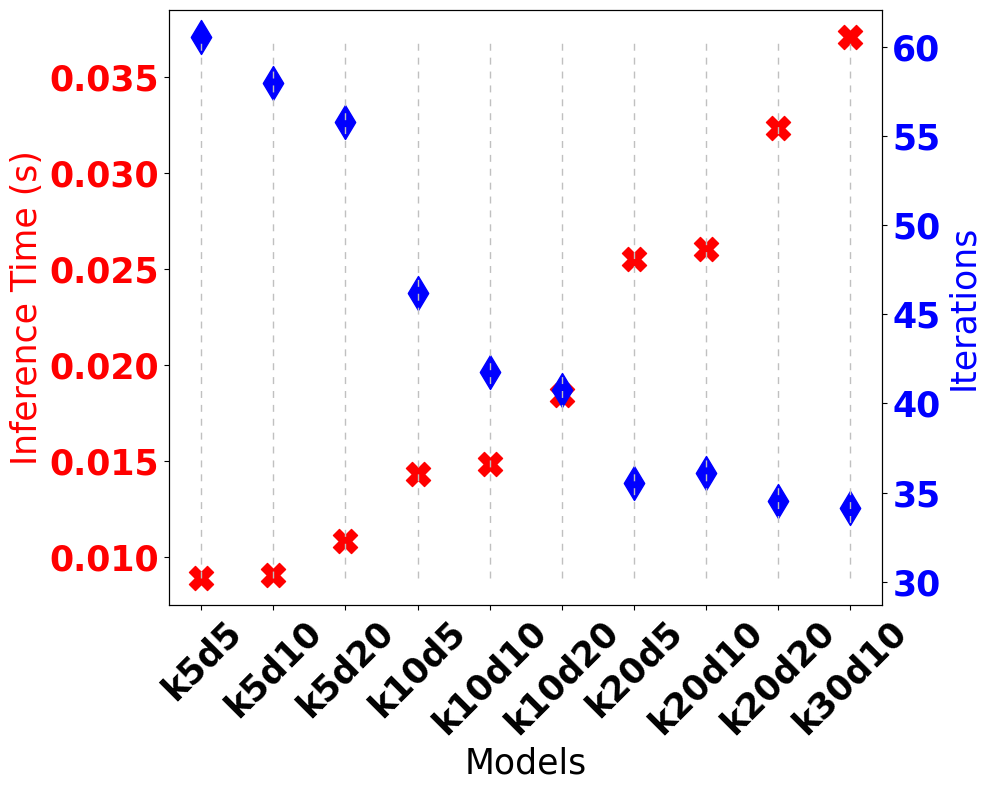

In [24]:
new_list = ['k5d5', 'k5d10', 'k5d20', 'k10d5',  'k10d10',
            'k10d20', 'k20d5', 'k20d10', 'k20d20', 'k30d10', 'ASM-LU']

fig, ax1 = plt.subplots(figsize=(10,8))

color = 'red'
ax1.set_xlabel('Models', fontsize = 25)
ax1.set_ylabel('Inference Time (s)', color=color, fontsize = 25)
ax1.xaxis.set_tick_params(labelsize=25)
ax1.set_xticklabels(new_list[:-1], rotation=45)
ax1.yaxis.set_tick_params(labelsize=25)
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

ax1.scatter(new_list[:-1], mean_infer[:-1], color = color, s = 300, marker= "X", label="Time")
# ax1.scatter(new_list[-1], mean_infer[-1], color = color, s = 200, marker= "h", label="Time")
ax1.tick_params(axis='y', labelcolor="red")

# ax1.set_yscale('log')

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Iterations', color=color, fontsize = 25)  # we already handled the x-label with ax1
ax2.scatter(new_list[:-1], mean_step[:-1], color=color, s=300, marker= "d", label="Iterations")
# ax2.scatter(new_list[-1], mean_step[-1], color=color, s=200, marker= "h", label="Iterations")
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_tick_params(labelsize=25)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

plt.vlines(new_list[:-1], np.min(mean_step), np.max(mean_step), colors='silver', linestyles=(0,(5,5)), lw=1.)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("results/test_saved_10k_multiple/inference_time_2.png", dpi = 400, transparent = True)
plt.show()

/tmp/ipykernel_5875/1630471550.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(new_list[:-1], rotation=45)


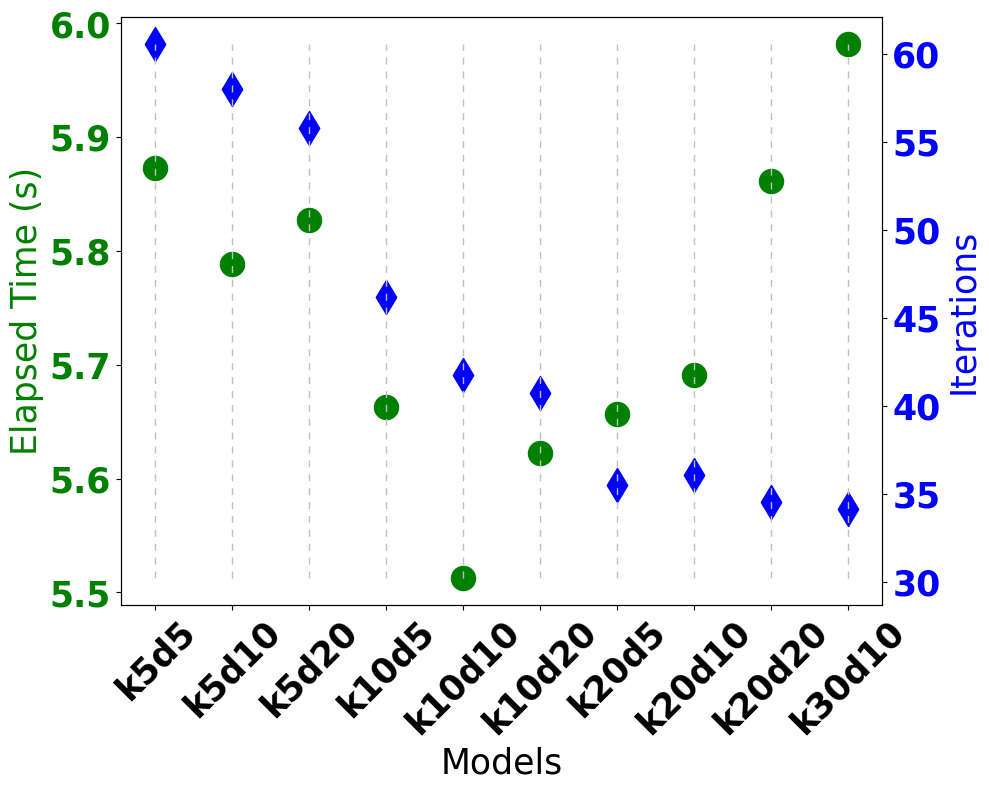

In [25]:
fig, ax1 = plt.subplots(figsize=(10,8))

color = 'green'
ax1.set_xlabel('Models', fontsize = 25)
ax1.set_ylabel('Elapsed Time (s)', color=color, fontsize = 25)
ax1.xaxis.set_tick_params(labelsize=25)
ax1.yaxis.set_tick_params(labelsize=25)
ax1.set_xticklabels(new_list[:-1], rotation=45)

ax1.scatter(new_list[:-1], mean_time[:-1], color = color, s = 300, marker= "o", label="Time")
# ax1.scatter(new_list[-1], mean_infer[-1], color = color, s = 200, marker= "h", label="Time")
ax1.tick_params(axis='y', labelcolor="green")
# ax1.set_yscale('log')
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')
    
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Iterations', color=color, fontsize = 25)  # we already handled the x-label with ax1
ax2.scatter(new_list[:-1], mean_step[:-1], color=color, s=300, marker= "d", label="Iterations")
# ax2.scatter(new_list[-1], mean_step[-1], color=color, s=200, marker= "h", label="Iterations")
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_tick_params(labelsize=25)
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

plt.vlines(new_list[:-1], np.min(mean_step), np.max(mean_step), colors='silver', linestyles=(0,(5,5)), lw=1.0)
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("results/test_saved_10k_multiple/global_time_2.png", dpi = 400, transparent = True)
plt.show()